<a href="https://colab.research.google.com/github/mmadunic/git_uvod/blob/master/Matija_Madunic_projekt.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

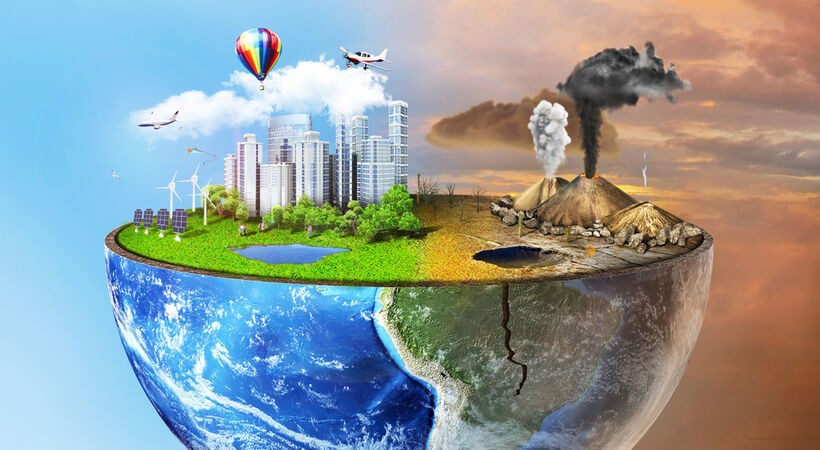


# **U.S. Pollution Data**



Kolegij *Uvod u podatkovnu znanost*

studentica Matija Madunić, Informatika



# Uvod



Cilj ovog projekta je istražiti i analizirati podatke o onečišćenju zraka u regijama SAD-a.
Projekt će obuhvatiti nekoliko ključnih koraka. Prvo, bit će provedeno učitavanje podataka iz odabranog dataseta, a zatim će se poduzeti koraci čišćenja  kako bi se osigurala kvaliteta i dosljednost podataka. Nakon toga, provest ću analize koje će uključivati identifikaciju najzagađenijih i najmanje zagađenih područja, istraživanje sezonskih varijacija u razinama zagađivača te ispitivanje povezanosti između različitih vrsta zagađivača.
Uz to, koristit ću alat Facebook Prophet za predviđanje budućih razina zagađivača u tri različite države.  Ovo predviđanje pomoći će nam razumjeti kako se očekuje da će se kvaliteta zraka mijenjati u budućnosti u određenim regijama.

# Dataset

Dataset za ovaj projekt odabran je sa [Kaggle](https://www.kaggle.com/) platforme koja nudi razne gotove Dataset-ove za projekte.

>Za svoj projekt odabrala sam [U.S. Pollution](https://www.kaggle.com/datasets/sogun3/uspollution) Dataset u kojem su podaci vezani za onečišćenje zraka u SAD-u.

Uvoz ključnih biblioteka

In [2]:
import pandas as pd  #manipulacija i analiza podataka (rad s tabličnim podacima - excel)
import numpy as np  #rad s višedimenzionalnim nizovima i matricama (operacije nad numeričkim podacima)
import matplotlib.pyplot as plt  #vizualizacija podataka (grafovi, dijagrami)
import seaborn as sns  #vizualizacija podataka(dodatne mogucnosti za stilizaciju, bazirana na matplotlibu)

## 1. Učitavanje podataka

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/MyDrive/uvod u podatkovnu znanost/PROJEKT

/content/drive/MyDrive/uvod u podatkovnu znanost/PROJEKT


In [5]:
df = pd.read_csv('pollution_us_2000_2016.csv')
df.head(3) #prva 3 redka

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


In [6]:
df.tail(3) #zadnja 3 redka

,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1746658,24601,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,-0.022727,0.0,0,0.0,Parts per million,0.100000,0.100,0,1.0
1746659,24602,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.067714,0.127,0,NaN
1746660,24603,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,...,Parts per billion,0.000000,0.0,5,NaN,Parts per million,0.100000,0.100,0,1.0


In [7]:
df.shape #informacije o broju redaka i broju stupaca

(1746661, 29)

## 2. Čišćenje podataka

#### 2.1. Izbacivanje nepotrebnih stupaca

Stupac "Unnamed" izbacujem jer ne pruža nikakve korisne informacije.

In [8]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)
df.head(3)
#drop funkcija kako bi uklonili stupac nazvan 'Unnamed: 0' iz skupa data
#inplace=True kako bi promijenio skup data "na licu mjesta" (tj. bez potrebe za dodatnim dodjeljivanjem)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,1.145833,4.2,21,NaN
1,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,3.000,9.0,21,13.0,Parts per million,0.878947,2.2,23,25.0
2,4,13,3002,1645 E ROOSEVELT ST-CENTRAL PHOENIX STN,Arizona,Maricopa,Phoenix,2000-01-01,Parts per billion,19.041667,...,Parts per billion,2.975,6.6,23,NaN,Parts per million,1.145833,4.2,21,NaN


#### 2.2. Nedefinirane/nedostajuće vrijednosti

Pomoću `isna()` provjeravamo postoje li nedefinirani/nedostajući `NaN` podaci. Koristimo metodu `sum()` kako bismo prebrojali koliko je takvih podataka u svakom stupcu.

In [9]:
df.isna().sum()

State Code                0
County Code               0
Site Num                  0
Address                   0
State                     0
County                    0
City                      0
Date Local                0
NO2 Units                 0
NO2 Mean                  0
NO2 1st Max Value         0
NO2 1st Max Hour          0
NO2 AQI                   0
O3 Units                  0
O3 Mean                   0
O3 1st Max Value          0
O3 1st Max Hour           0
O3 AQI                    0
SO2 Units                 0
SO2 Mean                  0
SO2 1st Max Value         0
SO2 1st Max Hour          0
SO2 AQI              872907
CO Units                  0
CO Mean                   0
CO 1st Max Value          0
CO 1st Max Hour           0
CO AQI               873323
dtype: int64

>Vidimo da `NaN` vrijednosti postoje u stupcima "SO2 AQI" i "CO AQI".

`NaN` vrijednosti ću se riješiti na način da ću te retke popuniti srednjom vrijednosti.
>Pri popunjavanju `NaN` vrijednosti srednjom vrijednošću, koristi se srednja vrijednost stupca u kojem se nalazi ta NaN vrijednost. Točnije, izračunavamo srednju vrijednost svih poznatih (non-NaN) vrijednosti u tom određenom stupcu i tu vrijednost koristimo kao zamjenu za sve NaN vrijednosti u istom stupcu.

In [10]:
df['SO2 AQI'] = df['SO2 AQI'].fillna(df['SO2 AQI'].mean())

In [11]:
df['CO AQI'] = df['CO AQI'].fillna(df['CO AQI'].mean())

In [12]:
#provjera ima li još  NaN vrijednosti
df.isna().sum()

State Code           0
County Code          0
Site Num             0
Address              0
State                0
County               0
City                 0
Date Local           0
NO2 Units            0
NO2 Mean             0
NO2 1st Max Value    0
NO2 1st Max Hour     0
NO2 AQI              0
O3 Units             0
O3 Mean              0
O3 1st Max Value     0
O3 1st Max Hour      0
O3 AQI               0
SO2 Units            0
SO2 Mean             0
SO2 1st Max Value    0
SO2 1st Max Hour     0
SO2 AQI              0
CO Units             0
CO Mean              0
CO 1st Max Value     0
CO 1st Max Hour      0
CO AQI               0
dtype: int64

#### 2.3. Duplicirani podaci

In [13]:
#broj dupliciranih redaka
df.duplicated().sum()

5032

`df.loc[df.duplicated()]` u pandas DataFrame-u koristi se za identifikaciju i prikaz redaka koji su duplicirani, odnosno redaka koji imaju identične vrijednosti u svim stupcima.

>`df.duplicated()` vraća seriju (eng. Series) boolean vrijednosti, gdje je svaki redak označen kao *True* ako je dupliciran, odnosno *False* ako nije.

>`df.loc[df.duplicated()]` zatim koristi ovu seriju kao masku za izdvajanje redaka u DataFrame-u gdje su vrijednosti *True*, odnosno gdje su redci duplicirani.

>`pandas.DataFrame.loc`: čisto indeksiranje zasnovano na lokaciji koristeći oznake za odabir.

In [14]:
df.loc[df.duplicated()]

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
54236,21,145,1024,"JACKSON PURCHASE RECC, 2901 POWELL STREET",Kentucky,McCracken,Paducah,2000-08-15,Parts per billion,13.173913,...,Parts per billion,0.695652,2.0,20,3.000000,Parts per million,0.134783,0.300,19,5.996595
54237,21,145,1024,"JACKSON PURCHASE RECC, 2901 POWELL STREET",Kentucky,McCracken,Paducah,2000-08-15,Parts per billion,13.173913,...,Parts per billion,0.695652,2.0,20,3.000000,Parts per million,0.120833,0.200,19,2.000000
54238,21,145,1024,"JACKSON PURCHASE RECC, 2901 POWELL STREET",Kentucky,McCracken,Paducah,2000-08-15,Parts per billion,13.173913,...,Parts per billion,0.585714,1.3,20,7.115945,Parts per million,0.134783,0.300,19,5.996595
54239,21,145,1024,"JACKSON PURCHASE RECC, 2901 POWELL STREET",Kentucky,McCracken,Paducah,2000-08-15,Parts per billion,13.173913,...,Parts per billion,0.585714,1.3,20,7.115945,Parts per million,0.120833,0.200,19,2.000000
54248,21,145,1024,"JACKSON PURCHASE RECC, 2901 POWELL STREET",Kentucky,McCracken,Paducah,2000-08-16,Parts per billion,13.869565,...,Parts per billion,1.913043,7.0,22,10.000000,Parts per million,0.186957,0.300,7,5.996595
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1734014,19,163,15,10TH ST. & VINE ST. DAVENPORT,Iowa,Scott,Davenport,2016-05-31,Parts per billion,5.390909,...,Parts per billion,0.082609,0.5,10,0.000000,Parts per million,0.200000,0.200,0,2.000000
1734015,19,163,15,10TH ST. & VINE ST. DAVENPORT,Iowa,Scott,Davenport,2016-05-31,Parts per billion,5.390909,...,Parts per billion,0.071429,0.3,11,7.115945,Parts per million,0.193136,0.237,6,5.996595
1734016,19,163,15,10TH ST. & VINE ST. DAVENPORT,Iowa,Scott,Davenport,2016-05-31,Parts per billion,5.390909,...,Parts per billion,0.071429,0.3,11,7.115945,Parts per million,0.200000,0.200,0,2.000000
1740745,39,35,60,E. 14TH & ORANGE,Ohio,Cuyahoga,Cleveland,2016-04-23,Parts per billion,5.043478,...,Parts per billion,0.000000,0.0,5,7.115945,Parts per million,0.233826,0.320,20,5.996595


Duplikate iz Dataframe-a uklanjamo pomoću metode `drop_duplicates`.

In [15]:
df.drop_duplicates(inplace=True)
print('Broj duplikata nakon brisanja:', df.duplicated().sum())

Broj duplikata nakon brisanja: 0


In [16]:
#koliko redaka imamo nakon dropanja
print('Data shape:', df.shape)

Data shape: (1741629, 28)


##### **Resetiranje indeksa nakon uklanjanja**

---

Nakon brisanja podataka potrebno je i resetirati indekse okvira.

>`reset_index`: Metoda koja resetira indekse DataFrame-a.

>`drop=True`: Ova opcija sprječava dodavanje starog indeksa kao nove stupce u DataFrame. Ako ne bismo postavili *drop=True*, stari indeks bi bio dodan kao nova kolona u DataFrame. Ako postavimo *drop=False*, indeksi će biti dodani kao nova kolona, a novi indeksi će biti dodani kao novi indeksi.

>`inplace=True`: Ova opcija znači da će promjene biti napravljene "na licu mjesta" u samom DataFrame-u, bez potrebe za dodatnim dodjeljivanjem (neće stvoriti novi DataFrame, već će promijeniti postojeći).

In [17]:
df.reset_index(drop=True, inplace=True)

In [18]:
df.tail(2)

,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,NO2 Mean,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
1741627,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.93913,...,Parts per billion,0.0,0.0,5,7.115945,Parts per million,0.067714,0.127,0,5.996595
1741628,56,21,100,NCore - North Cheyenne Soccer Complex,Wyoming,Laramie,Not in a city,2016-03-31,Parts per billion,0.93913,...,Parts per billion,0.0,0.0,5,7.115945,Parts per million,0.100000,0.100,0,1.000000


#### 2.4. Tipovi podataka po stupcima

`df.info()` služi za prikaz informacija o DataFrame-u, uključujući broj nepopunjenih vrijednosti (nula), tipove podataka u svakom stupcu, i ukupnu potrošnju memorije.

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1741629 entries, 0 to 1741628
Data columns (total 28 columns):
 #   Column             Dtype  
---  ------             -----  
 0   State Code         int64  
 1   County Code        int64  
 2   Site Num           int64  
 3   Address            object 
 4   State              object 
 5   County             object 
 6   City               object 
 7   Date Local         object 
 8   NO2 Units          object 
 9   NO2 Mean           float64
 10  NO2 1st Max Value  float64
 11  NO2 1st Max Hour   int64  
 12  NO2 AQI            int64  
 13  O3 Units           object 
 14  O3 Mean            float64
 15  O3 1st Max Value   float64
 16  O3 1st Max Hour    int64  
 17  O3 AQI             int64  
 18  SO2 Units          object 
 19  SO2 Mean           float64
 20  SO2 1st Max Value  float64
 21  SO2 1st Max Hour   int64  
 22  SO2 AQI            float64
 23  CO Units           object 
 24  CO Mean            float64
 25  CO 1st Max Value  

---

<br>

`df.describe()` je Pandas metoda koja se koristi za generiranje osnovnih statističkih informacija o numeričkim podacima u DataFrame-u.

Rezultat `df.describe()` uključuje sljedeće informacije:

1. **Count (Broj):** Broj nepraznih (non-null) elemenata u svakom stupcu. Ovo vam pomaže u prepoznavanju eventualnih nedostajućih vrijednosti.

2. **Mean (Srednja vrijednost):** Prosječna vrijednost u svakom stupcu.

3. **Std (Standardna devijacija):** Standardna devijacija, koja mjeri raspršenost podataka u odnosu na srednju vrijednost.

4. **Min (Minimum):** Najmanja vrijednost u svakom stupcu.

5. **25% (Prvi kvartil):** Vrijednost koja dijeli nižih 25% podataka.

6. **50% (Medijan):** Srednja vrijednost podataka, ili vrijednost koja dijeli podatke na pola.

7. **75% (Treći kvartil):** Vrijednost koja dijeli najviših 25% podataka.

8. **Max (Maksimum):** Najveća vrijednost u svakom stupcu.

In [20]:
df.describe()

,State Code,County Code,Site Num,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
count,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06,1.741629e+06
mean,2.227342e+01,7.161298e+01,1.120184e+03,1.282225e+01,2.541112e+01,1.172808e+01,2.389458e+01,2.611990e-02,3.919667e-02,1.016794e+01,3.603631e+01,1.872209e+00,4.496270e+00,9.663176e+00,7.118632e+00,3.683295e-01,6.203171e-01,7.872603e+00,5.996252e+00
std,1.724575e+01,7.954513e+01,2.004000e+03,9.509134e+00,1.599956e+01,7.876583e+00,1.516127e+01,1.136705e-02,1.533386e-02,4.002038e+00,1.974284e+01,2.762601e+00,7.685450e+00,6.729269e+00,8.447239e+00,3.139755e-01,6.438836e-01,7.977721e+00,4.132921e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,-2.000000e+00,-2.000000e+00,0.000000e+00,0.000000e+00,-4.375000e-01,-4.000000e-01,0.000000e+00,0.000000e+00
25%,6.000000e+00,1.700000e+01,9.000000e+00,5.750000e+00,1.300000e+01,5.000000e+00,1.200000e+01,1.787500e-02,2.900000e-02,9.000000e+00,2.500000e+01,2.571430e-01,9.000000e-01,5.000000e+00,3.000000e+00,1.833330e-01,2.920000e-01,0.000000e+00,5.000000e+00
50%,1.700000e+01,5.900000e+01,6.000000e+01,1.073913e+01,2.400000e+01,9.000000e+00,2.300000e+01,2.587500e-02,3.800000e-02,1.000000e+01,3.300000e+01,9.875000e-01,2.000000e+00,8.000000e+00,7.115945e+00,2.939130e-01,4.000000e-01,6.000000e+00,5.996595e+00
75%,4.000000e+01,9.700000e+01,1.039000e+03,1.771429e+01,3.560000e+01,2.000000e+01,3.300000e+01,3.388900e-02,4.800000e-02,1.100000e+01,4.200000e+01,2.328571e+00,5.000000e+00,1.400000e+01,7.115945e+00,4.666670e-01,8.000000e-01,1.300000e+01,5.996595e+00
max,8.000000e+01,6.500000e+02,9.997000e+03,1.395417e+02,2.670000e+02,2.300000e+01,1.320000e+02,9.508300e-02,1.410000e-01,2.300000e+01,2.180000e+02,3.216250e+02,3.510000e+02,2.300000e+01,2.000000e+02,7.508333e+00,1.990000e+01,2.300000e+01,2.010000e+02


## 3. Ispitivanje podataka

### **3.1**. **Koji grad je najzagađeniji?**

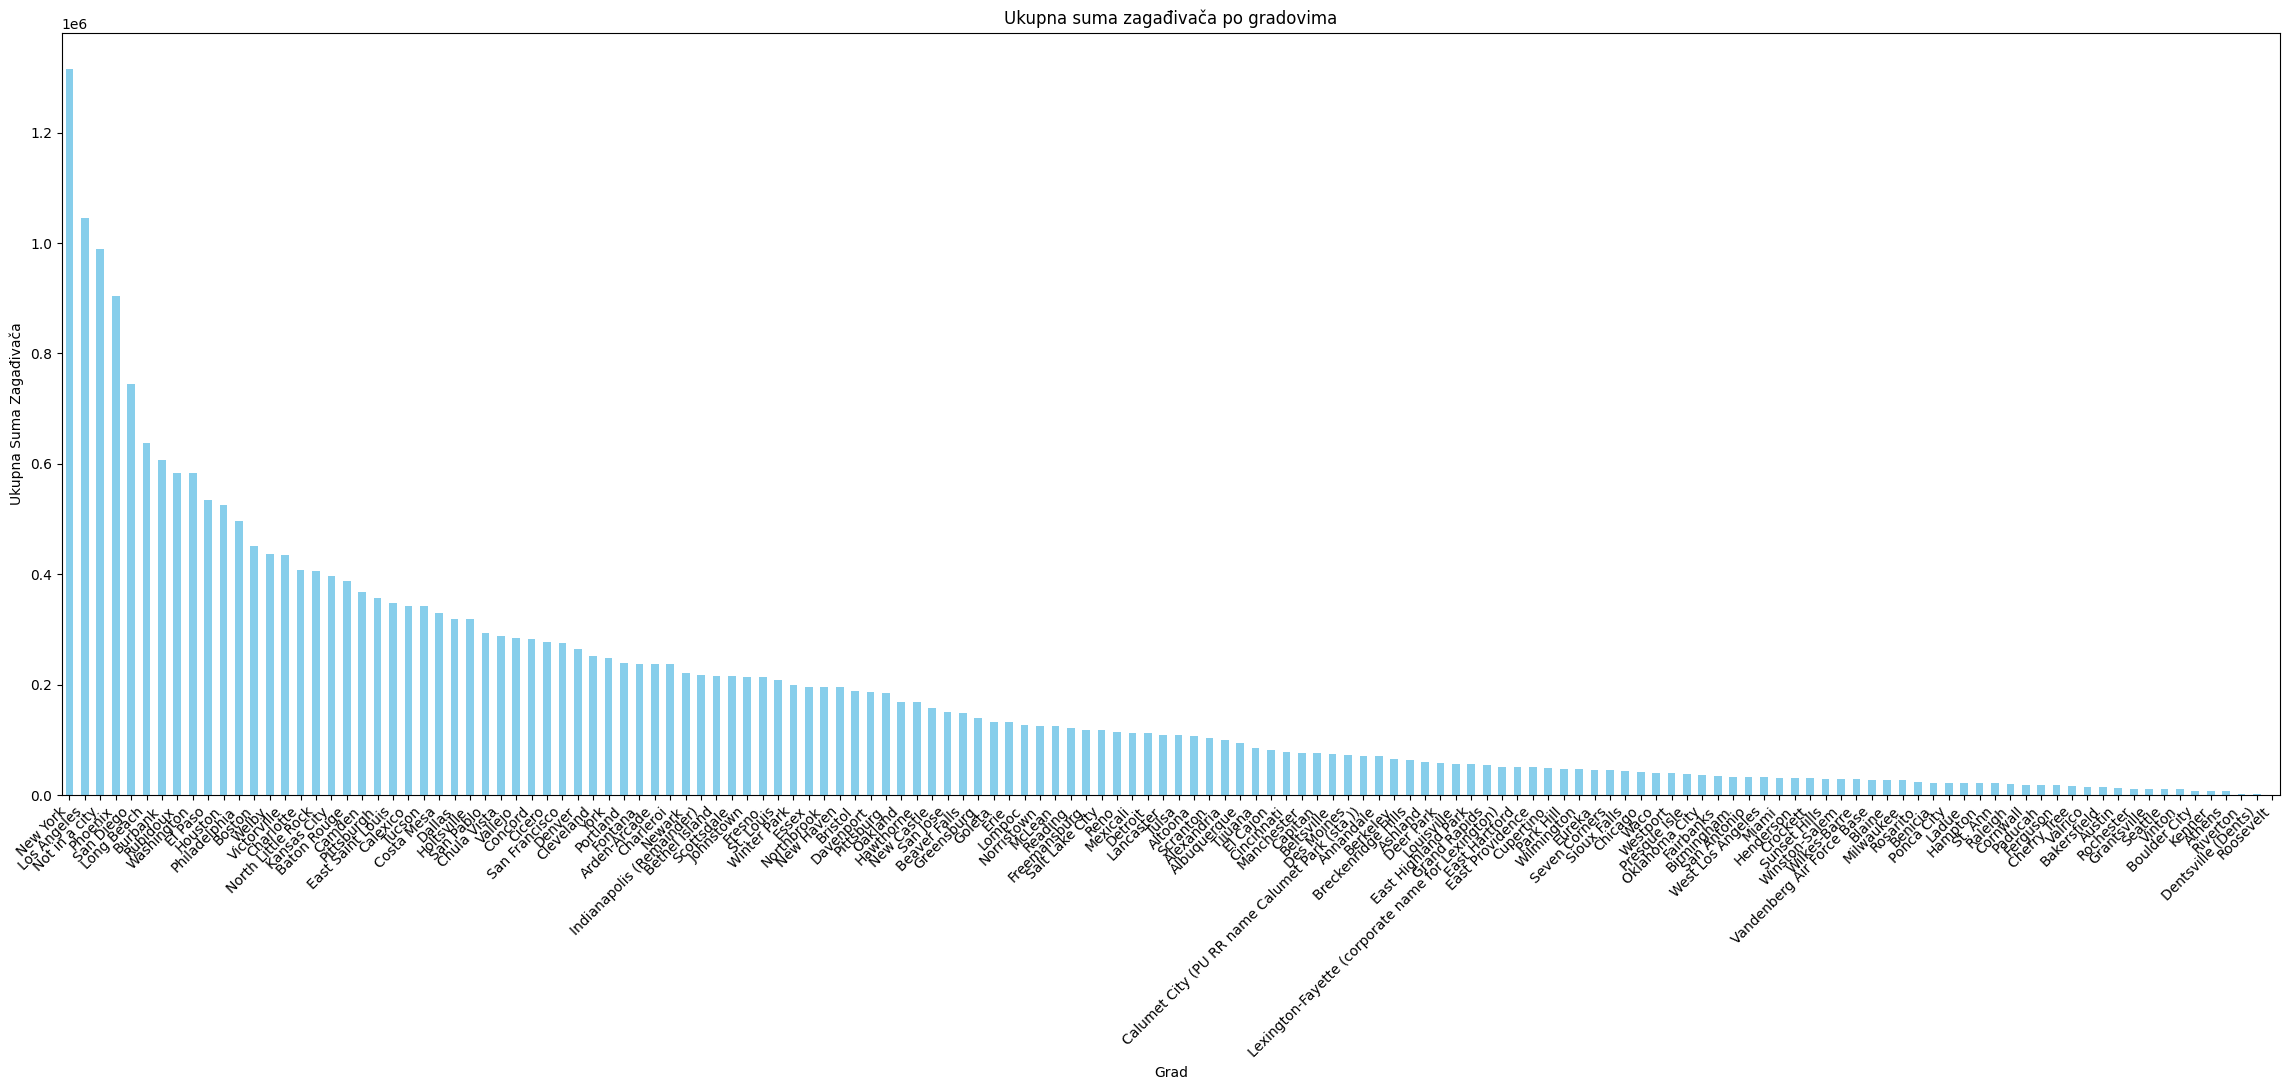



Najzagađeniji grad je: New York
Ukupna suma zagađivača za najzagađeniji grad (New York): 1315262.89217


In [23]:
#potrebni stupci
zagadivaci = df[['City', 'NO2 Mean', 'SO2 Mean', 'CO Mean']]

#izračunaj ukupnu sumu zagađivača za svaki grad
zagadenje_suma = zagadivaci.groupby('City').sum()

#izračunaj ukupnu sumu svih zagađivača i pronađi grad s najvećom sumom
najzagadeniji_grad = zagadenje_suma.sum(axis=1).idxmax()
#axis=1 -> stupac, axis=0 -> redak
#idxmax(): metoda koja vraća indeks (u ovom slučaju, ime grada) koji odgovara maksimalnoj vrijednosti

#vizualizacija
plt.figure(figsize=(23, 11))
ax = zagadenje_suma.sum(axis=1).sort_values(ascending=False).plot(kind='bar', color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  #Postavljanje teksta pod kutem
plt.title('Ukupna suma zagađivača po gradovima')
plt.xlabel('Grad')
plt.ylabel('Ukupna Suma Zagađivača')
plt.tight_layout()  #Osigurava da se tekst ne reže
plt.show()

#ispis ukupne sume zagađivača za najzagađeniji grad
ukupna_suma_najzagadenijeg_grada = zagadenje_suma.loc[najzagadeniji_grad].sum()
print(f"\n\nNajzagađeniji grad je: {najzagadeniji_grad}")
print(f"Ukupna suma zagađivača za najzagađeniji grad ({najzagadeniji_grad}): {ukupna_suma_najzagadenijeg_grada}")

#vrijednosti uključene u ukupnu sumu zagađivača su vrijednosti NO2 Mean, SO2 Mean i CO Mean

### 3.2. **Koji grad je najmanje zagađen?**

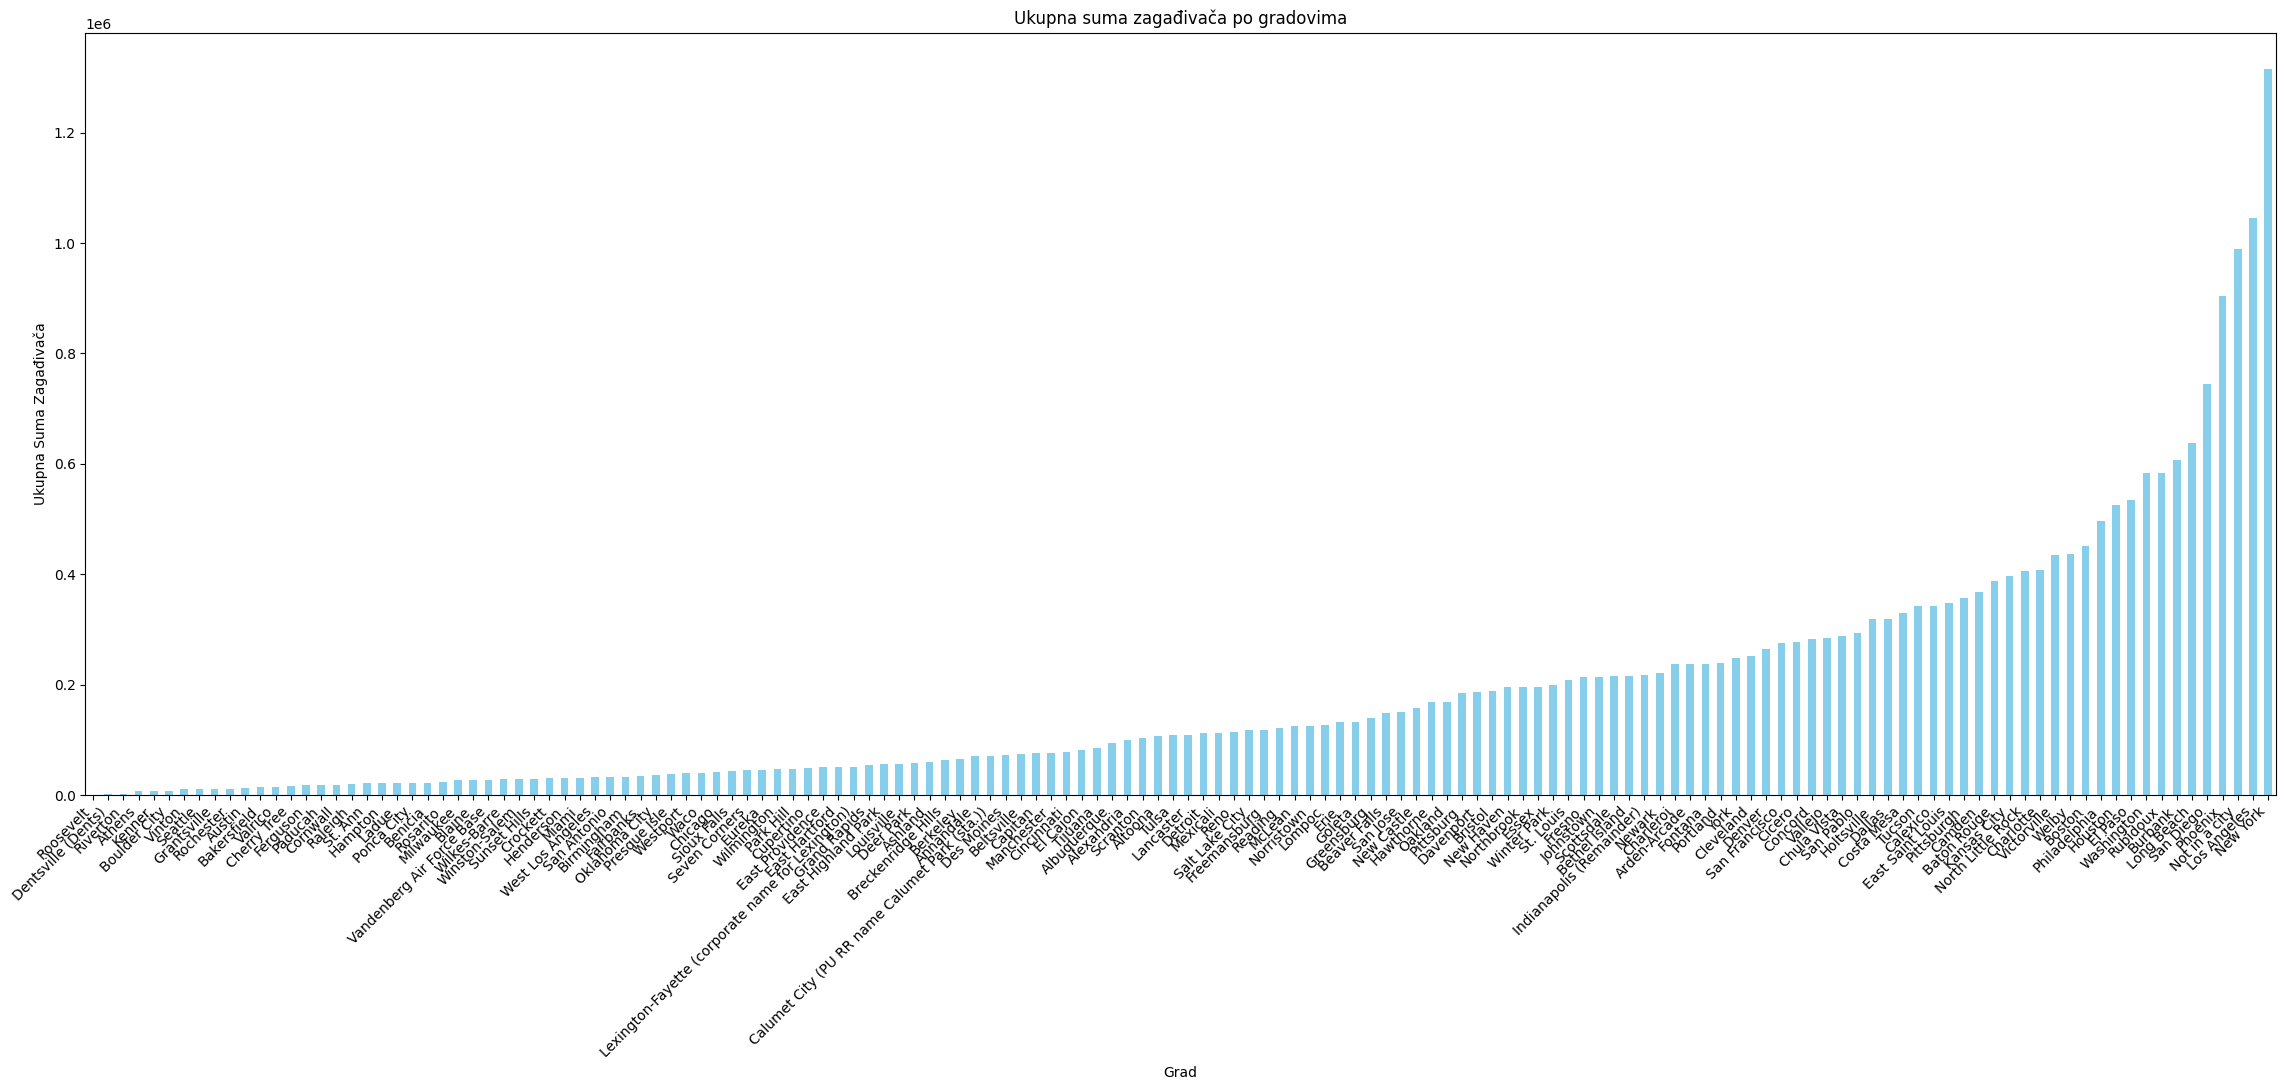



Najmanje zagađen grad je: Roosevelt
Ukupna suma zagađivača za najmanje zagađen grad (Roosevelt): 243.120206


In [24]:
#pronaći grad s najmanjom ukupnom sumom zagađivača
najmanje_zagaden_grad = zagadenje_suma.sum(axis=1).idxmin()
#idxmax(): metoda koja vraća indeks (u ovom slučaju, ime grada) koji odgovara maksimalnoj vrijednosti

#vizualizacija
plt.figure(figsize=(23, 11))
ax = zagadenje_suma.sum(axis=1).sort_values().plot(kind='bar', color='skyblue')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')  #Postavljanje teksta pod kutem
plt.title('Ukupna suma zagađivača po gradovima')
plt.xlabel('Grad')
plt.ylabel('Ukupna Suma Zagađivača')
plt.tight_layout()  #Osigurava da se tekst ne reže
plt.show()

#ispis ukupne sume zagađivača za najmanje zagađen grad
ukupna_suma_najmanje_zagadenog_grada = zagadenje_suma.loc[najmanje_zagaden_grad].sum()
print(f"\n\nNajmanje zagađen grad je: {najmanje_zagaden_grad}")
print(f"Ukupna suma zagađivača za najmanje zagađen grad ({najmanje_zagaden_grad}): {ukupna_suma_najmanje_zagadenog_grada}")

#vrijednosti uključene u ukupnu sumu zagađivača su vrijednosti NO2 Mean, SO2 Mean i CO Mean

>Ukupna suma zagađivača koju sam koristila u prethodnim primjerima je zbroj tih vrijednosti za određeni grad. Budući da su mjerne jedinice i vrste zagađivača različite, ukupna suma ne predstavlja mjernu jedinicu, već samo agregaciju tih različitih mjernih jedinica u jedan broj.
>>Vrijednosti uključene u ukupnu sumu zagađivača su vrijednosti NO2 Mean, SO2 Mean i CO Mean.

### **3.3.** **Koje države ili regije imaju najviše razine zagađivača?**

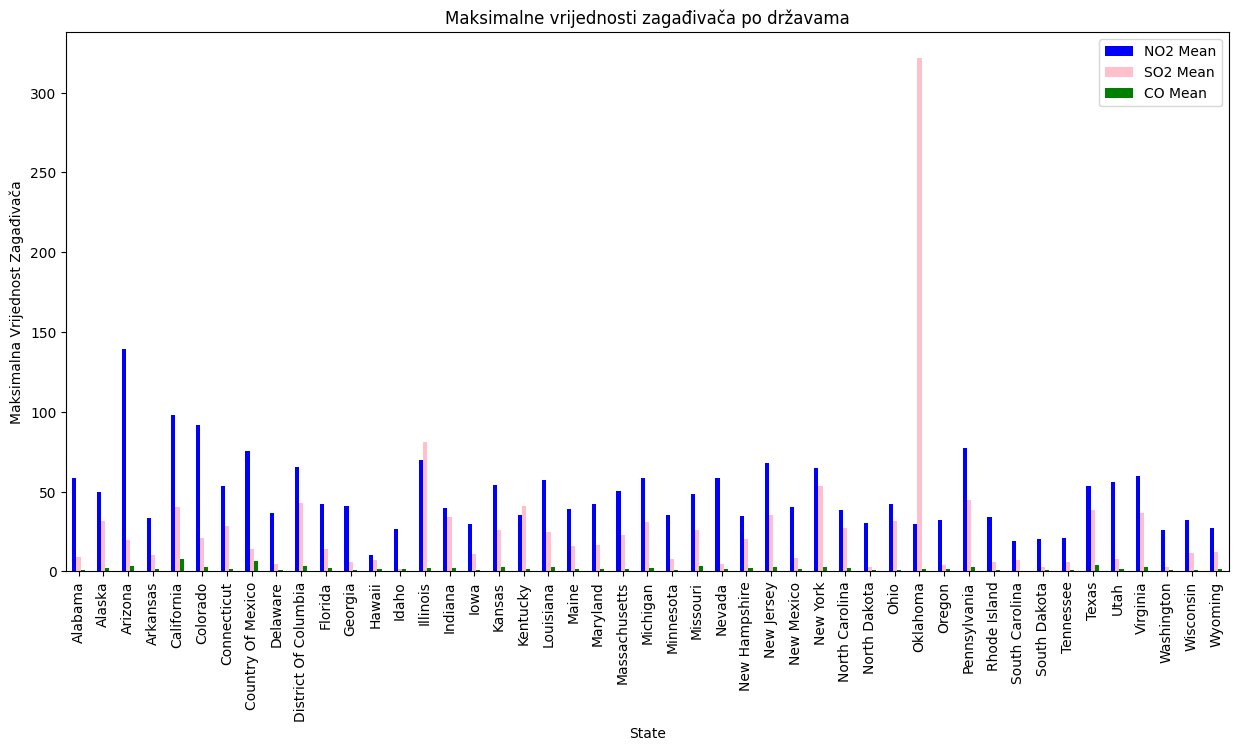

In [28]:
#maksimalne vrijednosti po državama
maksimalne_vrijednosti_drzava = df.groupby('State')[['NO2 Mean', 'SO2 Mean', 'CO Mean']].max()
#grupiramo df prema vrijednostima u stupcu State stvarajuci grupe podataka za svaku drzavu
#odabiremo 'NO2 Mean', 'SO2 Mean', 'CO Mean' iz originalnog df

# vizualizacija maksimalnih vrijednosti
maksimalne_vrijednosti_drzava.plot(kind='bar', color=['blue','pink','green'], legend=True, figsize=(15, 7))
plt.title('Maksimalne vrijednosti zagađivača po državama')
plt.ylabel('Maksimalna Vrijednost Zagađivača')
plt.show()


In [29]:
#države s najvišim vrijednostima za svaki zagađivač
najgore_države = {
    'NO2 Mean': maksimalne_vrijednosti_drzava['NO2 Mean'].idxmax(),
    'SO2 Mean': maksimalne_vrijednosti_drzava['SO2 Mean'].idxmax(),
    'CO Mean': maksimalne_vrijednosti_drzava['CO Mean'].idxmax()
}

#države s najnižim vrijednostima za svaki zagađivač
najbolje_države = {
    'NO2 Mean': maksimalne_vrijednosti_drzava['NO2 Mean'].idxmin(),
    'SO2 Mean': maksimalne_vrijednosti_drzava['SO2 Mean'].idxmin(),
    'CO Mean': maksimalne_vrijednosti_drzava['CO Mean'].idxmin()
}

#ispis najgorih država
print("Države s najgorim (najvećim) vrijednostima zagađivača:")
for zagađivač, država in najgore_države.items():
    print(f"-{zagađivač}: {država}")

#ispis najboljih država
print("\nDržave s najboljim (najmanjim) vrijednostima zagađivača:")
for zagađivač, država in najbolje_države.items():
    print(f"-{zagađivač}: {država}")


Države s najgorim (najvećim) vrijednostima zagađivača:
-NO2 Mean: Arizona
-SO2 Mean: Oklahoma
-CO Mean: California

Države s najboljim (najmanjim) vrijednostima zagađivača:
-NO2 Mean: Hawaii
-SO2 Mean: Idaho
-CO Mean: South Carolina


### **3.4.** **Postoje li sezonske varijacije u razinama zagađivača? Kako se mijenja zagađenje tijekom različitih godišnjih doba?**

In [30]:
#pretvaranje stupca 'Date Local' u tip podataka datuma
df['Date Local'] = pd.to_datetime(df['Date Local'])

#dodajem stupac 'Season' prema mjesecima
df['Season'] = df['Date Local'].dt.month.map({1: 'Winter', 2: 'Winter', 3: 'Spring', 4: 'Spring', 5: 'Spring', 6: 'Summer', 7: 'Summer', 8: 'Summer', 9: 'Fall', 10: 'Fall', 11: 'Fall', 12: 'Winter'})


In [32]:
#grupiranje po godišnjem dobu i računanje srednje vrijednosti
sezonske_statistike = df.groupby('Season').mean()
#računanje mean() u ovom kontekstu ima za cilj dobivanje prosječnih vrijednosti zagađivača za svako godišnje doba
#grupiranjem podataka po Season i primjenom funkcije mean(), dobivamo mean vrijednosti svakog zagađivača za svako od četiri godišnja doba

#ispis rezultata
print(sezonske_statistike)

        State Code  County Code     Site Num   NO2 Mean  NO2 1st Max Value  \
Season                                                                       
Fall     22.331022    72.923146  1129.433675  13.853327          26.808260   
Spring   22.706352    71.531678  1120.181081  11.623144          25.045393   
Summer   23.506332    75.347427  1113.499467  10.010845          21.188514   
Winter   20.102925    65.439223  1118.067167  16.693136          29.639058   

        NO2 1st Max Hour    NO2 AQI   O3 Mean  O3 1st Max Value  \
Season                                                            
Fall           12.575530  25.228417  0.022088          0.035564   
Spring         11.049046  23.557084  0.031364          0.044039   
Summer         10.861029  19.907814  0.030971          0.046835   
Winter         12.691562  27.859812  0.018140          0.027693   

        O3 1st Max Hour     O3 AQI  SO2 Mean  SO2 1st Max Value  \
Season                                                       

<ipython-input-32-28208a4b8b16>:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  sezonske_statistike = df.groupby('Season').mean()


Vizualizirat ću kako izgledaju promjene zagađivača prema godišnjim dobima.

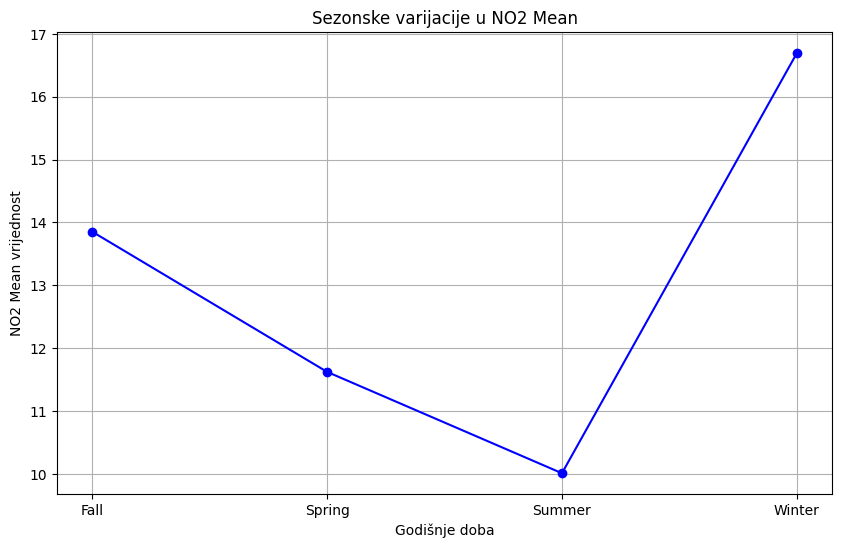

In [33]:
#primjer za NO2 Mean prema godišnjem dobu
plt.figure(figsize=(10, 6))
plt.plot(sezonske_statistike.index, sezonske_statistike['NO2 Mean'], marker='o', linestyle='-', color='b')
plt.title('Sezonske varijacije u NO2 Mean')
plt.xlabel('Godišnje doba')
plt.ylabel('NO2 Mean vrijednost')
plt.grid(True)
plt.show()


Iz grafa vidimo da je najveće zagađenje NO2 zimi, a najmanje ljeti.

---

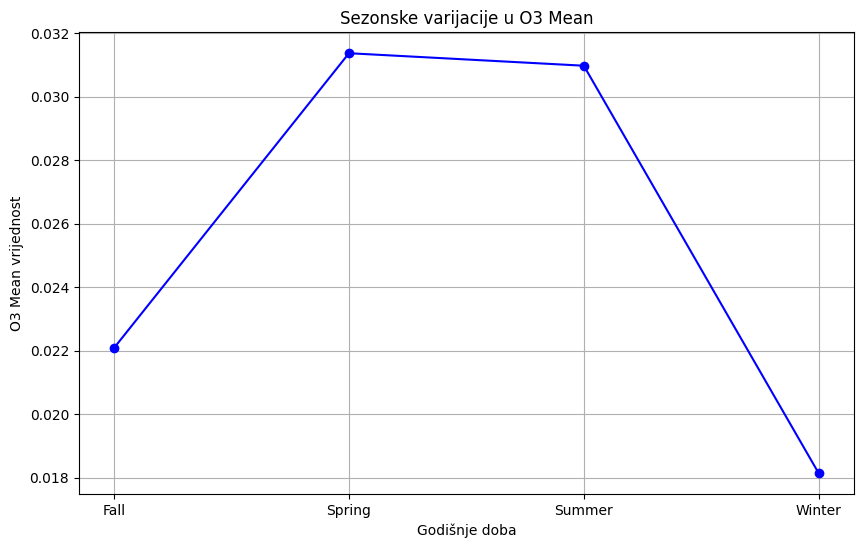

In [ ]:
#primjer za O3 Mean prema godišnjem dobu
plt.figure(figsize=(10, 6))
plt.plot(sezonske_statistike.index, sezonske_statistike['O3 Mean'], marker='o', linestyle='-', color='b')
plt.title('Sezonske varijacije u O3 Mean')
plt.xlabel('Godišnje doba')
plt.ylabel('O3 Mean vrijednost')
plt.grid(True)
plt.show()

Iz grafa vidimo da je zagađenje O3 najveće u proljeće i ljeto, a najmanje zimi.

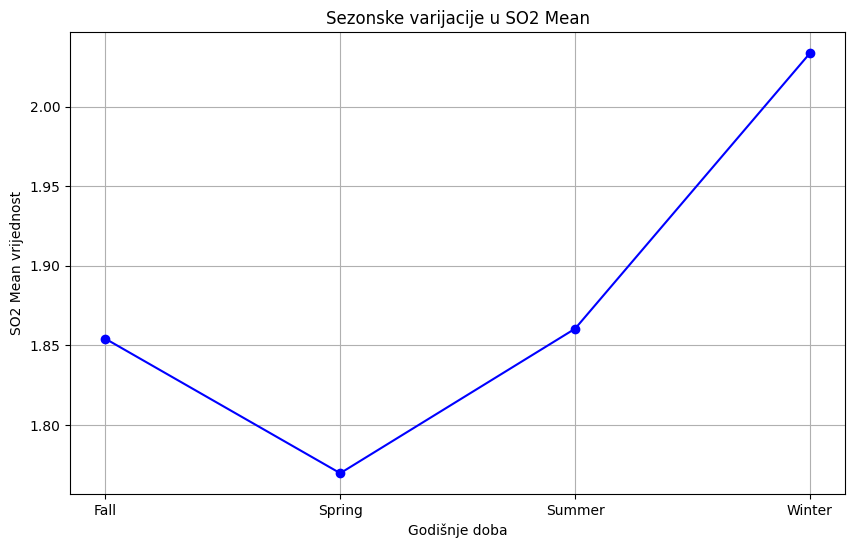

In [34]:
#primjer za SO2 Mean prema godišnjem dobu
plt.figure(figsize=(10, 6))
plt.plot(sezonske_statistike.index, sezonske_statistike['SO2 Mean'], marker='o', linestyle='-', color='b')
plt.title('Sezonske varijacije u SO2 Mean')
plt.xlabel('Godišnje doba')
plt.ylabel('SO2 Mean vrijednost')
plt.grid(True)
plt.show()

Iz grafa vidimo da je SO2 zagađenje najmanje u proljeće, a najveće zimi.

### **3.5.** **Postoji li povezanost između različitih vrsta zagađivača?**

**Matrica korelacije** je kvadratna matrica koja prikazuje korelaciju između svih parova varijabli u skupu podataka. Svaka varijabla u skupu podataka ima svoj redak i stupac u matrici, a svaka ćelija sadrži koeficijent korelacije između odgovarajućih varijabli.

<br>

**Koeficijent korelacije** mjeri jačinu i smjer linearnog odnosa između dviju varijabli.

Vrijednosti koeficijenta korelacije kreću se između -1 i 1.
* **pozitivne vrijednosti** ukazuju na pozitivnu linearnu povezanost (rast jednog zagađivača povezan je s rastom drugog)

* **negativne vrijednosti** ukazuju na negativnu linearnu povezanost (rast jednog zagađivača povezan je s padom drugog)

* **vrijednosti blizu nula** ukazuju na slabu ili nikakvu linearnu povezanost

Matrica korelacije često se koristi u analizi podataka kako bi se istražile veze između varijabli u skupu podataka.

<br>

<br>



Matrica prikazuje korelaciju između NO2 Mean, O3 Mean, SO2 Mean i CO Mean.

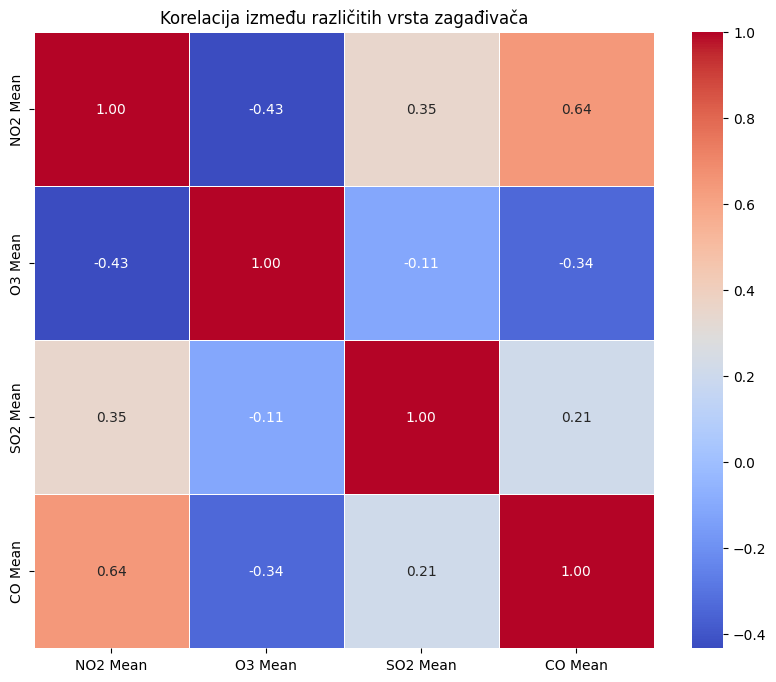

In [35]:
#izdvajanje samo stupaca s vrijednostima zagađivača
zagađivači = df[['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']]

#izračun korelacijske matrice
korelacija = zagađivači.corr()

#vizualizacija korelacijske matrice
plt.figure(figsize=(10, 8))
sns.heatmap(korelacija, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Korelacija između različitih vrsta zagađivača')
plt.show()


Iz matrice korelacije možemo iščitati:

**Za NO2:**
*   NO2 vrijednost raste  -> O3 vrijednost opada
*   NO2 vrijednost raste  -> CO vrijednost raste

Dakle, NO2 sa O3 ima negativnu korelaciju, a s CO pozitivnu korelaciju.

**Za SO2:**
* SO2 vrijednost raste -> NO2 vrijednost raste
* SO2 vrijednost raste -> O3 vrijednost opada

Dakle, SO2 sa O3 ima negativnu korelaciju, a s NO2 pozitivnu korelaciju.

## 4. Predviđanje budućnosti - *Forecasting*

**Predviđanje** (prognoziranje, *forecasting*) je zadatak podatkovne znanosti koji pomaže različitim poslovnim organizacijama pri planiranju kapaciteta, donošenju različitih odluka, postavljanju ciljeva i otkrivanju anomalija.

>***Forecasting*** se temelji na predviđanju budućnosti što je moguće točnije koristeći dostupne informacije poput povijesnih podataka i spoznajama o potencijalnim budućim događanjima koja bi mogla utjecati na predviđanje.

### 4.1. *FB Prophet*

[FB Prophet](https://facebook.github.io/prophet/) je paket za predviđanje u R i Pythonu koji je razvio Facebookov tim za istraživanje podataka.

* Procedura za predviđanje vremenskih nizova koju je 2018. godine predstavio Facebook ([S. J. Taylor & Letham, 2018](https://www.tandfonline.com/doi/abs/10.1080/00031305.2017.1380080?journalCode=utas20)).

* **IDEJA:** olakšati predviđanje vremenskih nizova velikom broju korisnika, omogućujući pri tom korištenje različitih tipova vremenskih nizova.


In [36]:
#!pip install prophet #instaliramo prophet paket

import prophet
from prophet import Prophet
print("Prophet version:", prophet.__version__)

Prophet version: 1.1.5



Cilj je za tri države ( 'State' ) predvidjeti koliko će  u budućnosti rasti ili opadati zagađivači.

<br>

U 3 različita DataFrame-a izvući ću podatke vezane za iduće gradove te ih pripremiti u odgovarajućem formatu za Prophet:

* Arizona
* Illinois
* Hawaii

<br>

>Svakom gradu predviđat ću isti zagađivač, NO2, da vidimo koliko se mijenja i koliko položaj same države ovisi o tome.

In [37]:
# Izdvajanje podataka za svaku državu i odabir samo potrebnih stupaca (uključujući i datum)
arizona_df = df[df['State'] == 'Arizona'][['Date Local', 'NO2 Mean']].copy()
illinois_df = df[df['State'] == 'Illinois'][['Date Local', 'NO2 Mean']].copy()
hawaii_df = df[df['State'] == 'Hawaii'][['Date Local', 'NO2 Mean']].copy()

In [38]:
arizona_df
#illinois_df
#hawaii_df

,Date Local,NO2 Mean
0,2000-01-01,19.041667
1,2000-01-01,19.041667
2,2000-01-01,19.041667
3,2000-01-01,19.041667
4,2000-01-02,22.958333
...,...,...
1718390,2016-03-30,2.462500
1718391,2016-03-31,9.250000
1718392,2016-03-31,9.250000
1718393,2016-03-31,9.250000


Prophet model kao ulaz očekuje dataframe s dva stupca ds i y:

* `ds` (datastamp): idealno oblika `YYYY-MM-DD` za datum ili `HH:MM:SS` za vrijeme
* `y`: numeričke vrijednosti, mjerenje koje želimo predviđati.

<br>

Stupac 'Date Local' ću preimenovati u 'ds'.

In [39]:
#'Date Local' u 'ds' za sve tri države
arizona_df.rename(columns={'Date Local': 'ds'}, inplace=True)
illinois_df.rename(columns={'Date Local': 'ds'}, inplace=True)
hawaii_df.rename(columns={'Date Local': 'ds'}, inplace=True)

In [40]:
arizona_df

,ds,NO2 Mean
0,2000-01-01,19.041667
1,2000-01-01,19.041667
2,2000-01-01,19.041667
3,2000-01-01,19.041667
4,2000-01-02,22.958333
...,...,...
1718390,2016-03-30,2.462500
1718391,2016-03-31,9.250000
1718392,2016-03-31,9.250000
1718393,2016-03-31,9.250000


Također, mijenjam naziv stupcu 'NO2 Mean' u 'y' za sva tri DataFrame-a.

In [41]:
arizona_df.rename(columns={'NO2 Mean': 'y'}, inplace=True)
illinois_df.rename(columns={'NO2 Mean': 'y'}, inplace=True)
hawaii_df.rename(columns={'NO2 Mean': 'y'}, inplace=True)

In [42]:
arizona_df

,ds,y
0,2000-01-01,19.041667
1,2000-01-01,19.041667
2,2000-01-01,19.041667
3,2000-01-01,19.041667
4,2000-01-02,22.958333
...,...,...
1718390,2016-03-30,2.462500
1718391,2016-03-31,9.250000
1718392,2016-03-31,9.250000
1718393,2016-03-31,9.250000


Sljedeći korak je inicijalizacija i treniranje modela za sve tri države.
Svaka država ima zaseban model koji koristi povijesne podatke za predviđanje budućih vrijednosti zagađivača.

In [43]:
#inicijalizacija i treniranje modela za Arizona
arizona_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
arizona_model.fit(arizona_df[['ds', 'y']])
arizona_future = arizona_model.make_future_dataframe(periods=365)
arizona_forecast = arizona_model.predict(arizona_future)

#inicijalizacija i treniranje modela za Illinois
illinois_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
illinois_model.fit(illinois_df[['ds', 'y']])
illinois_future = illinois_model.make_future_dataframe(periods=365)
illinois_forecast = illinois_model.predict(illinois_future)

#inicijalizacija i treniranje modela za Hawaii
hawaii_model = Prophet(yearly_seasonality=True, daily_seasonality=False)
hawaii_model.fit(hawaii_df[['ds', 'y']])
hawaii_future = hawaii_model.make_future_dataframe(periods=365)
hawaii_forecast = hawaii_model.predict(hawaii_future)


DEBUG:cmdstanpy:input tempfile: /tmp/tmp31ncucrn/jfn8fet3.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp31ncucrn/8k5airvb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15109', 'data', 'file=/tmp/tmp31ncucrn/jfn8fet3.json', 'init=/tmp/tmp31ncucrn/8k5airvb.json', 'output', 'file=/tmp/tmp31ncucrn/prophet_modelclxxtdnt/prophet_model-20240130111255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
11:12:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
11:13:51 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
DEBUG:cmdstanpy:input tempfile: /tmp/tmp31ncucrn/8z2t2fh9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp31ncucrn/4kgx__0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/

In [44]:
arizona_forecast
#illinois_forecast
#hawaii_forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2000-01-01,35.998959,30.569554,50.260441,35.998959,35.998959,4.849070,4.849070,4.849070,-1.201278,-1.201278,-1.201278,6.050348,6.050348,6.050348,0.0,0.0,0.0,40.848030
1,2000-01-02,35.933337,29.275288,48.669428,35.933337,35.933337,3.066668,3.066668,3.066668,-3.104131,-3.104131,-3.104131,6.170799,6.170799,6.170799,0.0,0.0,0.0,39.000004
2,2000-01-03,35.867714,32.404229,52.069565,35.867714,35.867714,6.434958,6.434958,6.434958,0.131945,0.131945,0.131945,6.303013,6.303013,6.303013,0.0,0.0,0.0,42.302672
3,2000-01-04,35.802091,33.461216,54.131183,35.802091,35.802091,7.131279,7.131279,7.131279,0.687320,0.687320,0.687320,6.443960,6.443960,6.443960,0.0,0.0,0.0,42.933370
4,2000-01-05,35.736469,33.585307,52.416530,35.736469,35.736469,7.604865,7.604865,7.604865,1.014489,1.014489,1.014489,6.590377,6.590377,6.590377,0.0,0.0,0.0,43.341334
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6290,2017-03-27,10.596436,-1.212058,21.099892,7.089251,13.835257,-0.162775,-0.162775,-0.162775,0.131945,0.131945,0.131945,-0.294720,-0.294720,-0.294720,0.0,0.0,0.0,10.433661
6291,2017-03-28,10.592292,0.857965,21.377679,7.061366,13.848862,0.299288,0.299288,0.299288,0.687320,0.687320,0.687320,-0.388032,-0.388032,-0.388032,0.0,0.0,0.0,10.891580
6292,2017-03-29,10.588148,1.167776,21.322666,7.033482,13.861280,0.529930,0.529930,0.529930,1.014489,1.014489,1.014489,-0.484558,-0.484558,-0.484558,0.0,0.0,0.0,11.118078
6293,2017-03-30,10.584003,1.133845,21.627254,7.005597,13.869167,0.615896,0.615896,0.615896,1.200072,1.200072,1.200072,-0.584176,-0.584176,-0.584176,0.0,0.0,0.0,11.199900


### **Vizualizacija rezultata**

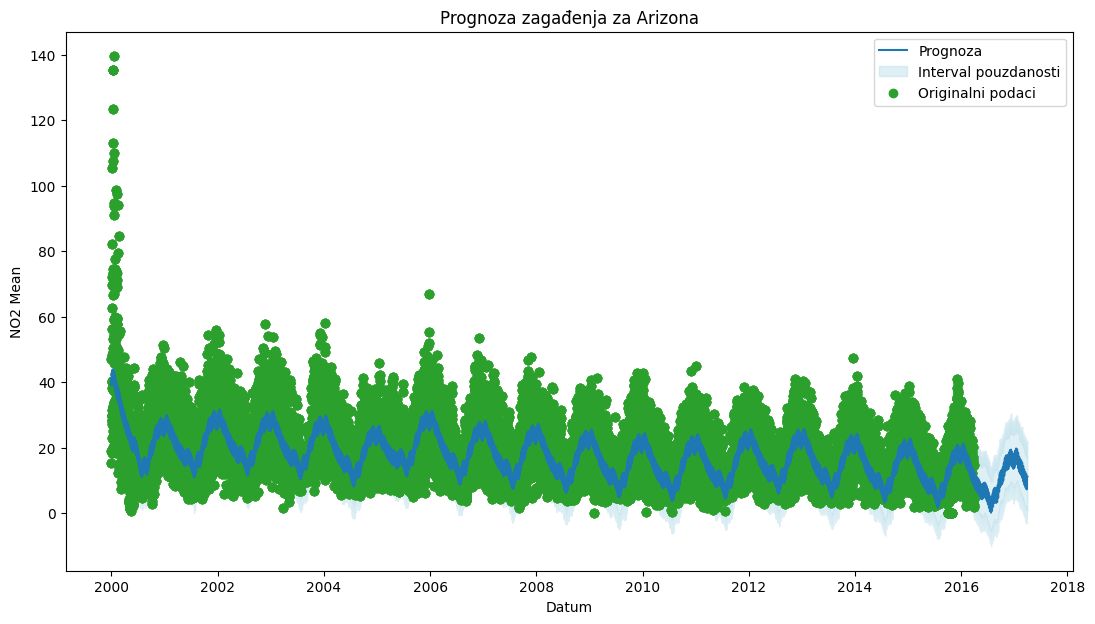

In [57]:
#Arizona
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(arizona_forecast['ds'], arizona_forecast['yhat'], label='Prognoza', color='tab:blue')
ax.fill_between(arizona_forecast['ds'], arizona_forecast['yhat_lower'], arizona_forecast['yhat_upper'],
                color='lightblue', alpha=0.4, label='Interval pouzdanosti')
ax.scatter(arizona_df['ds'], arizona_df['y'], color='tab:green', label='Originalni podaci')
ax.set_title('Prognoza zagađenja za Arizona')
ax.set_xlabel('Datum')
ax.set_ylabel('NO2 Mean')
ax.legend()
plt.show()


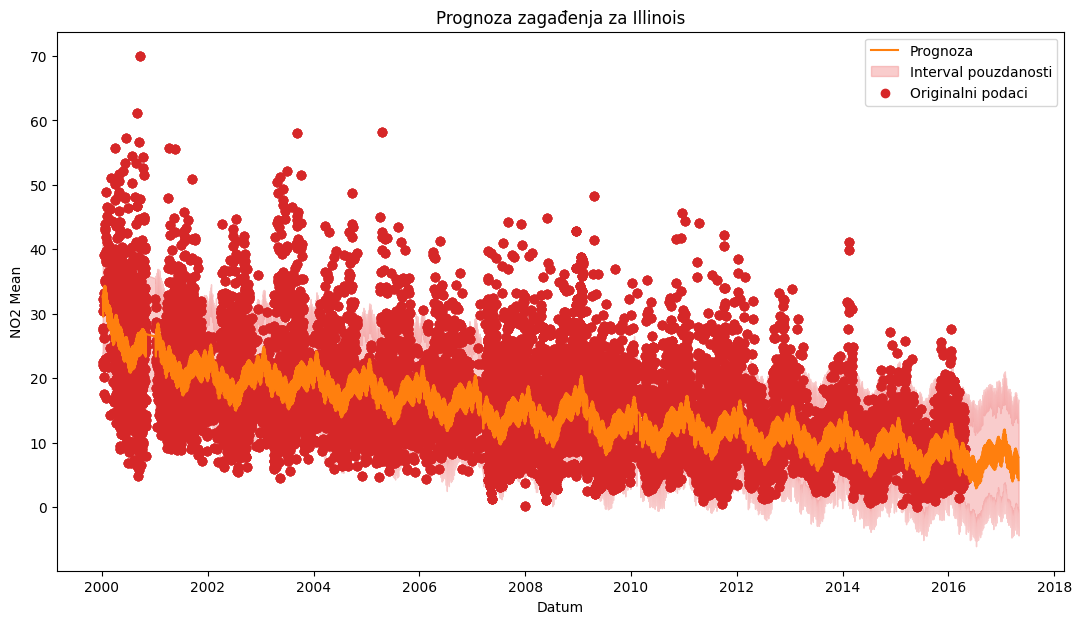

In [58]:
#Illinois
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(illinois_forecast['ds'], illinois_forecast['yhat'], label='Prognoza', color='tab:orange')
ax.fill_between(illinois_forecast['ds'], illinois_forecast['yhat_lower'], illinois_forecast['yhat_upper'],
                color='lightcoral', alpha=0.4, label='Interval pouzdanosti')
ax.scatter(illinois_df['ds'], illinois_df['y'], color='tab:red', label='Originalni podaci')
ax.set_title('Prognoza zagađenja za Illinois')
ax.set_xlabel('Datum')
ax.set_ylabel('NO2 Mean')
ax.legend()
plt.show()

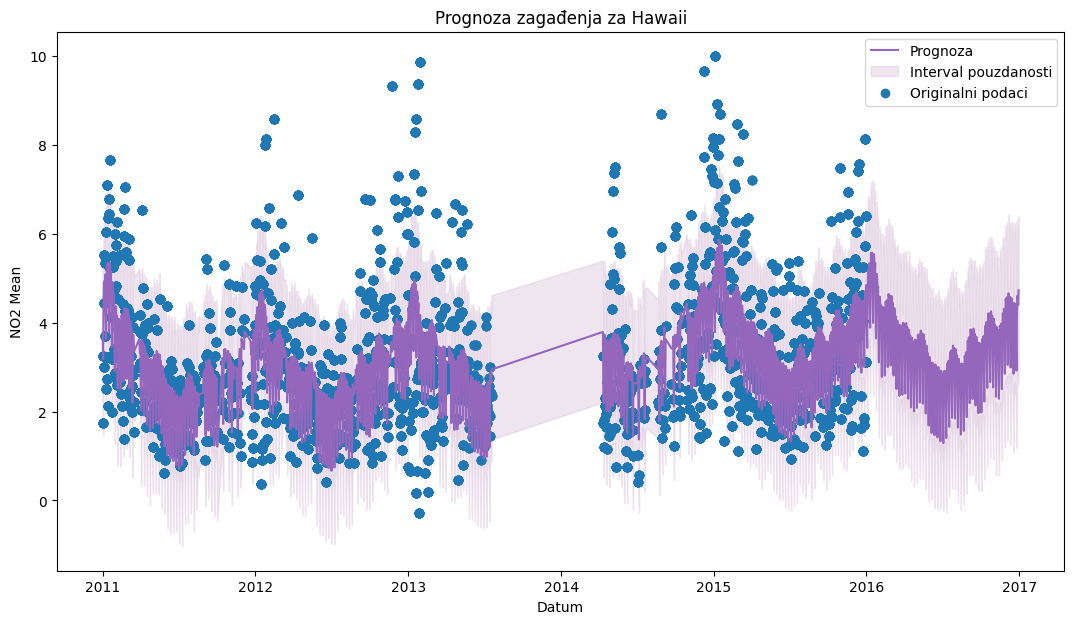

In [59]:
#Hawaii
fig, ax = plt.subplots(figsize=(13, 7))
ax.plot(hawaii_forecast['ds'], hawaii_forecast['yhat'], label='Prognoza', color='tab:purple')
ax.fill_between(hawaii_forecast['ds'], hawaii_forecast['yhat_lower'], hawaii_forecast['yhat_upper'], color='thistle', alpha=0.4, label='Interval pouzdanosti')
ax.scatter(hawaii_df['ds'], hawaii_df['y'], color='tab:blue', label='Originalni podaci')
ax.set_title('Prognoza zagađenja za Hawaii')
ax.set_xlabel('Datum')
ax.set_ylabel('NO2 Mean')
ax.legend()
plt.show()

### **Vizualizacija po komponentama**

**Trend komponenta:** prikazuje glavni smjer u kojem se mijenjaju vrijednosti NO2 tijekom vremena. Ako trend raste, to može ukazivati na povećanje zagađenja zraka tijekom vremena, dok pad trenda može sugerirati smanjenje.

**Godišnja komponenta:** prikazuje sezonske varijacije u razinama NO2. Na primjer, može se vidjeti je li zagađenje zraka češće u određeno doba godine, poput zime ili ljeta.

**Nedeljna komponenta:** Ako se uzimaju u obzir kratkotrajne varijacije, ova komponenta može pokazati cikličke promjene koje se ponavljaju svaki tjedan.

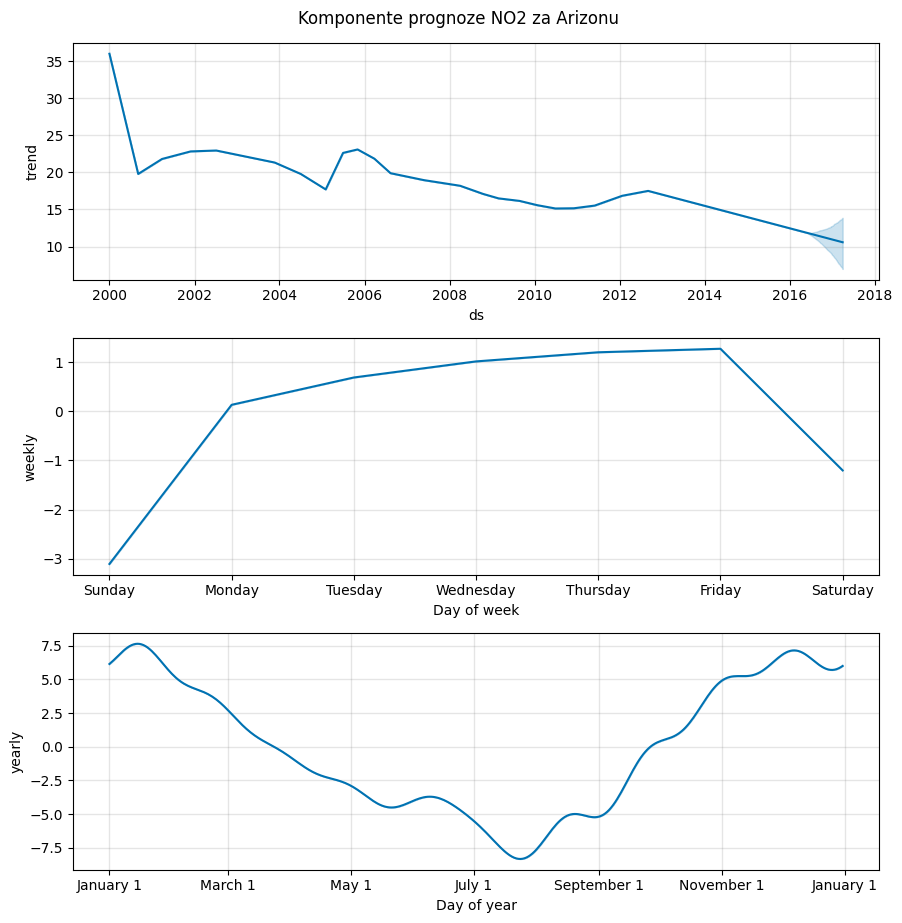

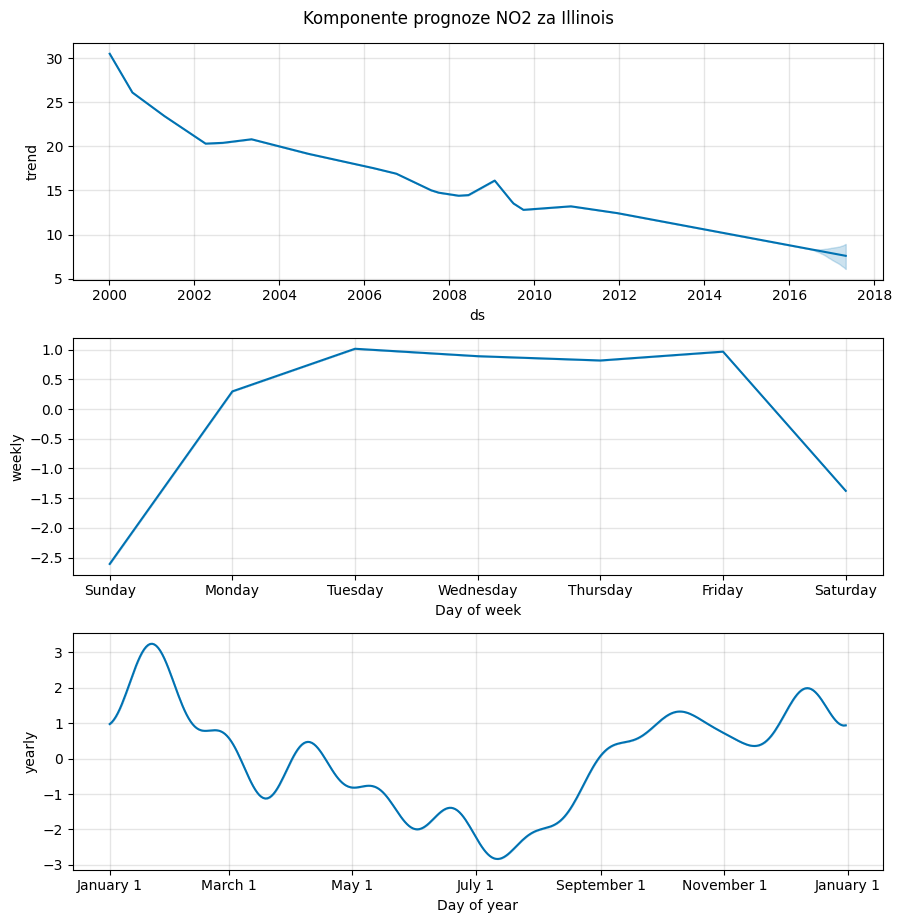

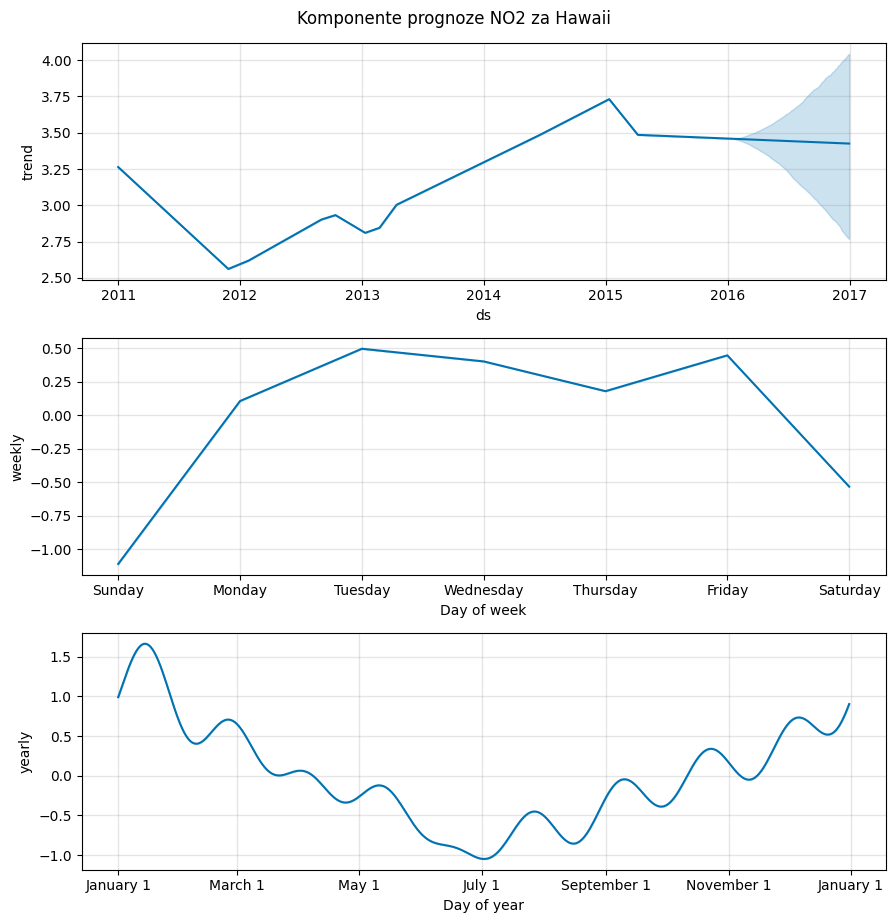

In [60]:
#Arizona
fig_arizona_components = arizona_model.plot_components(arizona_forecast)
fig_arizona_components.suptitle('Komponente prognoze NO2 za Arizonu', y=1.02)
plt.show()

#Illinois
fig_illinois_components = illinois_model.plot_components(illinois_forecast)
fig_illinois_components.suptitle('Komponente prognoze NO2 za Illinois', y=1.02)
plt.show()

#Hawaii
fig_hawaii_components = hawaii_model.plot_components(hawaii_forecast)
fig_hawaii_components.suptitle('Komponente prognoze NO2 za Hawaii', y=1.02)
plt.show()